In [2]:
from classy import Class
import numpy as np
import matplotlib.pyplot as plt
import custom_rcparams
import os

In [5]:
notebook_folder = os.path.dirname('')
images_folder = os.path.join(notebook_folder, "..", "Images")
def img_path(img_id):
    return os.path.join(images_folder, img_id)
def save_img(img_id):
    plt.savefig(img_path(img_id) + ".pdf", format='pdf', bbox_inches='tight')

In order to understand how to get to the CMB power spectrum, let us first recall the definition of the spherical harmonics transform of the CMB temperature field
$$ T(\hat{n})=\sum_{\ell m}a_{\ell m}Y_{\ell m}(\hat{n}) $$
The CMB power spectrum, on the other hand, is simply defined as the expectation value of the square of the spherical harmonics coefficients
$$ C_{\ell} \equiv \langle |a_{\ell m}^2| \rangle = \langle a_{\ell m}a^*_{\ell m} \rangle $$
Note that, in principle, this function should have two subscripts, $C_{\ell m}$, but because we assume that the universe is isotropic, it must have the same power spectrum towards both the x, y and z directions, and this implies full rotational invariance. As a result, there is no $m$ dependence in the power spectrum, and we simply average over $m$, and only call the spectrum $C_{\ell}$.

In [2]:
h = 0.67810
ob = 0.02238280
ocdm = 0.1201075

In [3]:
common_settings = {# LambdaCDM parameters
                   'h':h,
                   'omega_b':ob,
                   'omega_cdm': ocdm,
                   'A_s':2.100549e-09,
                   'tau_reio': 0.05430842}
l_max_scalars = 3000

In [4]:
cosmo = Class()
cosmo.set(common_settings)
cosmo.set({'output':'tCl,pCl,lCl','modes':'s,t','lensing':'yes','n_s':0.9660499,
       'l_max_scalars':l_max_scalars})
cosmo.compute()

In [5]:
cl_tot = cosmo.raw_cl(l_max_scalars)
cl_tot.keys()

dict_keys(['tt', 'ee', 'te', 'bb', 'pp', 'tp', 'ell'])

tt anisotropie temperature primarie autocorrelazioni

ee anisotropie angolari autocorrelazioni

te cross correlation t e 

The power spectrum is most often plotted in units of $\ell(\ell+1)/2\pi$ in $\mu K^2$, because it's overall trend is to drop as $\ell^2$. It is therefore easier to see features when plotted in these units, i.e. we multiply $C_{\ell}$ by $\frac{\ell(\ell+1)}{2\pi}(10^6T_{CMB0})^2$

In [6]:
ell = cl_tot['ell']
pi = np.pi
factor = (10**12)*ell*(ell+1.)/(2*pi)
import rcpresentation

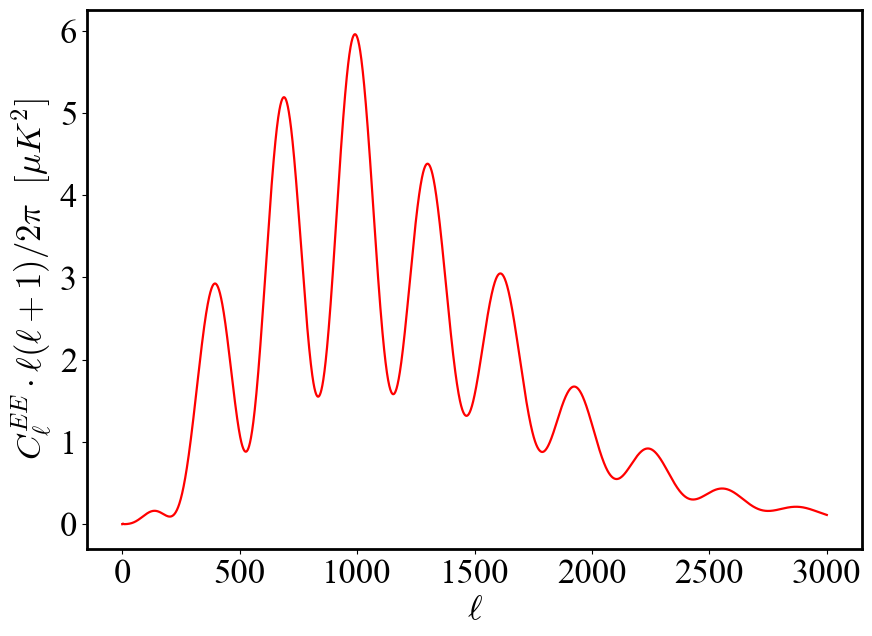

In [11]:
plt.plot(ell,(factor*(cl_tot['ee'])), color='r')
plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
save_img('EE1') #CL1

----

----

# GRAPHS

In [8]:
import pandas as pd

In [9]:
t_reio = np.round(np.linspace(0.0561-5*0.0071, 0.0561+5*0.0071, 20, endpoint=True),4)
df = pd.read_csv('CL_20.csv')

In [10]:
ell = df['ell'].values
ee = df['EE'].values
te = df['TE'].values
tt = df['TT'].values
tau = df['tau'].values

In [11]:
a = len(t_reio)
b = len(ell)
alpha = int(b/a)
ell1 = np.array(ell[0:alpha])
factor = (10**12)*ell1*(ell1+1.)/(2*np.pi)

In [12]:
print(a,b,alpha)

20 59980 2999


In [31]:
ee_vec = []
for i in range(a):
    y = factor*ee[i * alpha:(i + 1) * alpha]
    ee_vec.append(y)

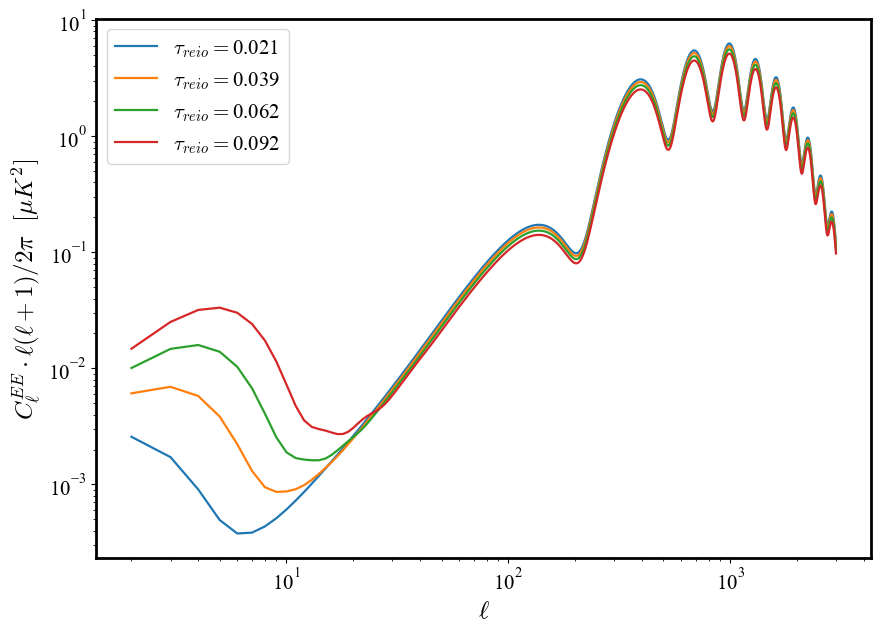

In [35]:
ind = len(ee_vec)
plt.loglog(ell1,ee_vec[0],label=r'$\tau_{reio}=$'+str(np.round(t_reio[0],3)))
plt.loglog(ell1,ee_vec[int(ind/3)-1], label=r'$\tau_{reio}=$'+str(np.round(t_reio[int(ind/3)-1],3)))
plt.loglog(ell1,ee_vec[2*int(ind/3)-1], label=r'$\tau_{reio}=$'+str(np.round(t_reio[2*int(ind/3)-1],3)))
plt.loglog(ell1,ee_vec[ind-1], label=r'$\tau_{reio}=$'+str(np.round(t_reio[ind-1],3)))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.legend()
save_img('EE2') #CL1plot

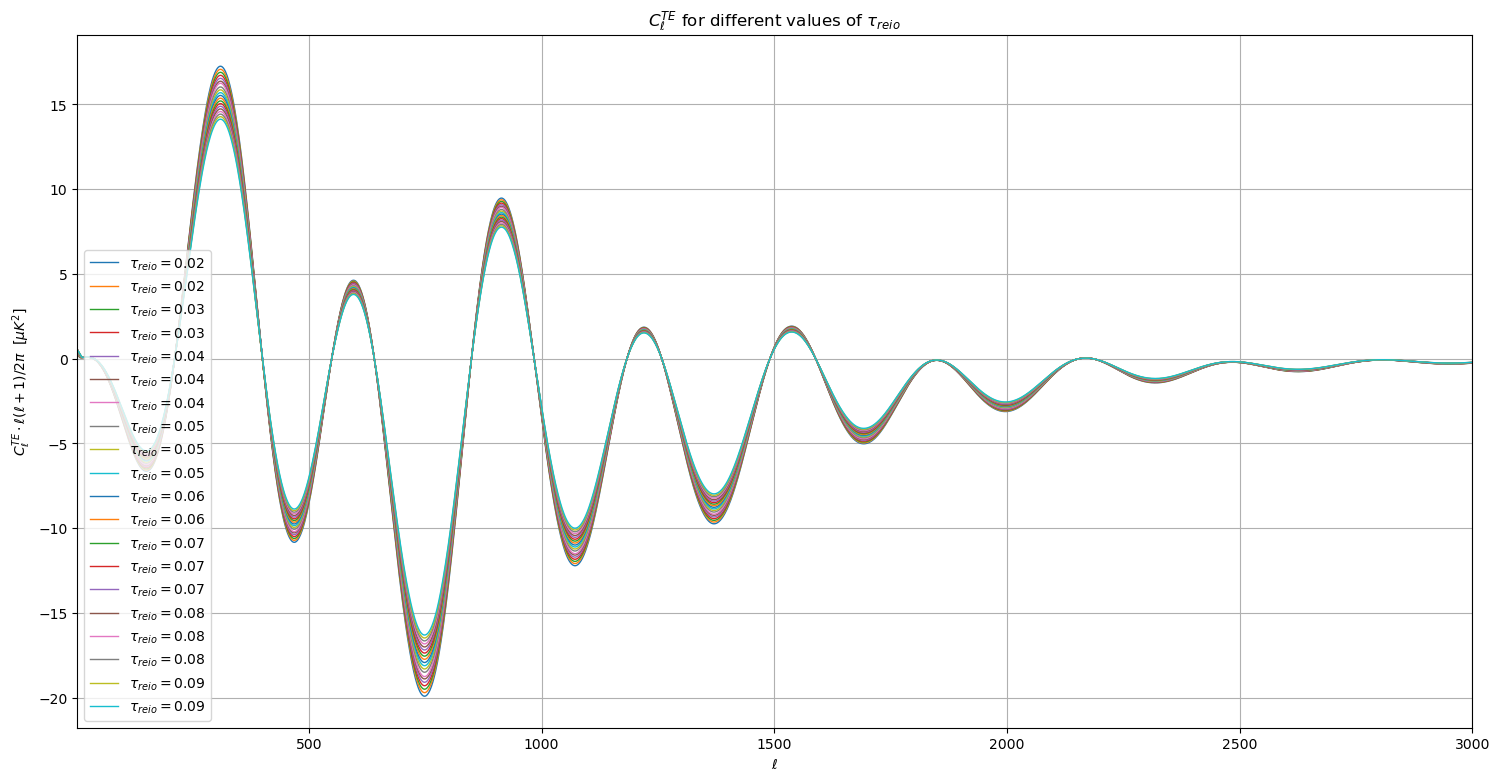

In [14]:
plt.figure(figsize=(18, 9))
plt.xlim([2,3000])
for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = te[i * alpha:(i + 1) * alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.plot(l,factor * y, lw=1, label=string)
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel('$C^{TE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{TE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  

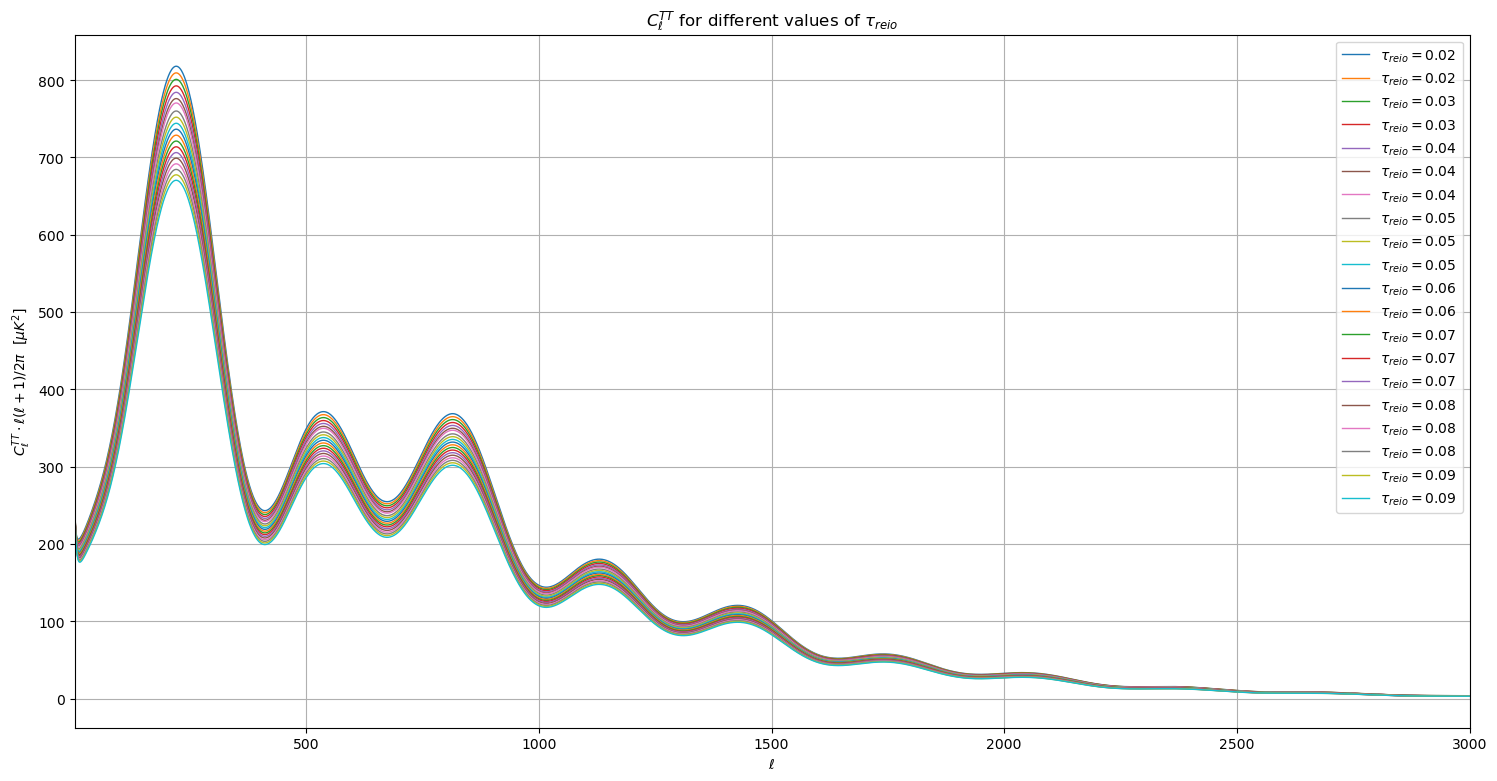

In [15]:
plt.figure(figsize=(18, 9))
plt.xlim([2,3000])

for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = tt[i * alpha:(i + 1) * alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.plot(l, factor * y, lw=1, label=string)
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel('$C^{TT}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{TT}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  

----
# RATIO
----

We compute
$$\frac{C_{\ell}^{EE}(\tau_{reio})}{C_{\ell}^{EE}(0.02)}$$

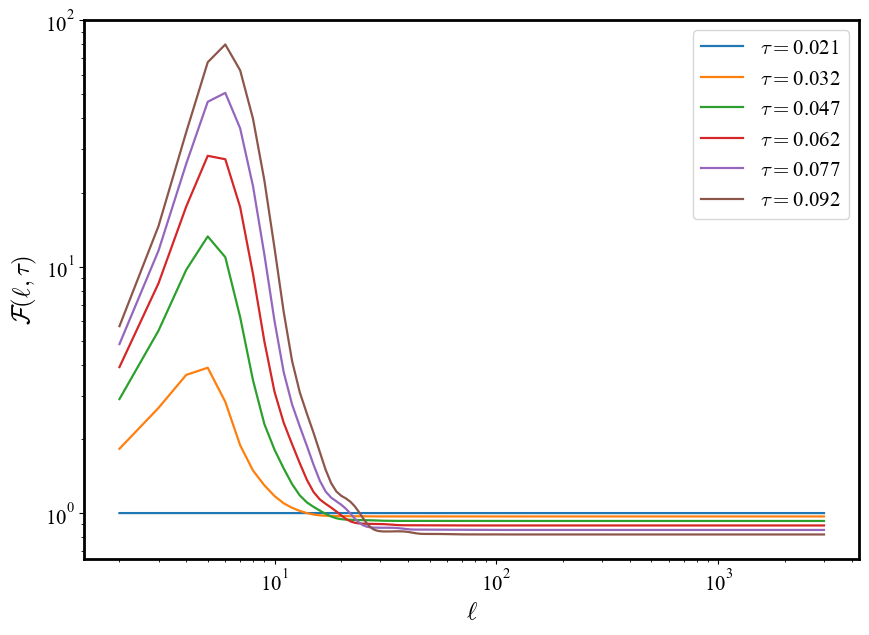

In [44]:
ind = len(ee_vec)
plt.loglog(ell1,ee_vec[0]/ee_vec[0],label=r'$\tau=$'+str(np.round(t_reio[0],3)))
plt.loglog(ell1,ee_vec[int(ind/5)-1]/ee_vec[0], label=r'$\tau=$'+str(np.round(t_reio[int(ind/5)-1],3)))
plt.loglog(ell1,ee_vec[2*int(ind/5)-1]/ee_vec[0], label=r'$\tau=$'+str(np.round(t_reio[2*int(ind/5)-1],3)))
plt.loglog(ell1,ee_vec[3*int(ind/5)-1]/ee_vec[0], label=r'$\tau=$'+str(np.round(t_reio[3*int(ind/5)-1],3)))
plt.loglog(ell1,ee_vec[4*int(ind/5)-1]/ee_vec[0], label=r'$\tau=$'+str(np.round(t_reio[4*int(ind/5)-1],3)))
plt.loglog(ell1,ee_vec[ind-1]/ee_vec[0], label=r'$\tau=$'+str(np.round(t_reio[ind-1],3)))
plt.xlabel(r'$\ell$')
plt.ylabel(r'$\mathcal{F}(\ell,\tau)$')
plt.legend()
save_img('CL1_Ratio_plot') #CL1_Ratio_plot

* for $\ell < 30$ we can see that $C_{\ell}^{EE}$ is proportional to $\tau$, but we don't know in what way
+ for $\ell >> 30$ we can see that $C_{\ell}^{EE}$ is inversely proportional to $\tau$, but we don't know in what way

The degraded EE 2-point function performance in the l < 20 region arises because of two different factors. First and foremost, we only consider cosmic variance over this multipole range since S4 will not be able to image the largest angular scales at l ≲ 40. The second effect comes from the scaling of the 2-point function with respect to τ, which is proportional to τ2 for l < 30. In fact, thedynamical range of the CEE in this specific multipole l range, across all the cosmologies considered, is 30 times bigger than the one outside.

----
We compute
$$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$$

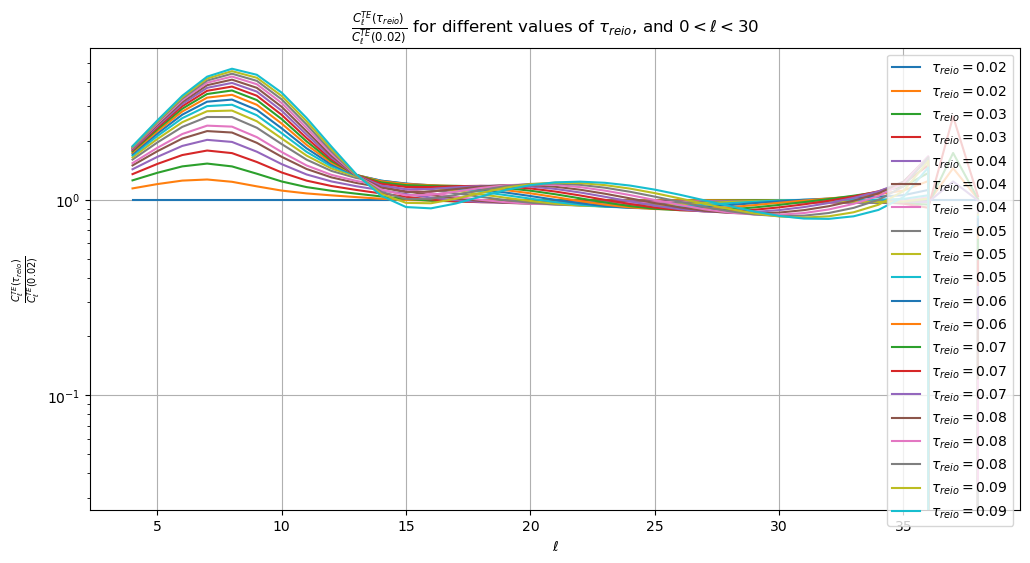

In [17]:
plt.figure(figsize=(12, 6))
for i in range (a):
    l = ell[(i * alpha)+2:(i + 1)*alpha]
    y = te[(i * alpha)+2:(i + 1)*alpha]/te[2:alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.semilogy(l[0:35],y[0:35], label=string)
    plt.legend()
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$')
plt.title(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$ for different values of $\tau_{reio}$, and $0<\ell<30}$')
plt.grid(True)
plt.show()  

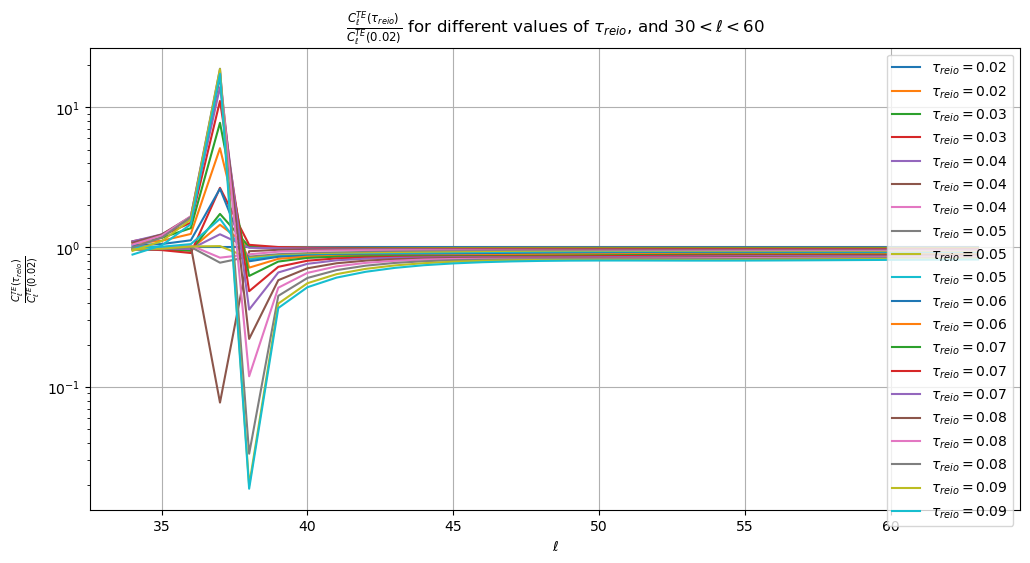

In [18]:
plt.figure(figsize=(12, 6))
for i in range (a):
    l = ell[(i * alpha)+2:(i + 1)*alpha]
    y = te[(i * alpha)+2:(i + 1)*alpha]/te[2:alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.semilogy(l[30:60],abs(y[30:60]), label=string)
    plt.legend()
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$')
plt.title(r'$\frac{C_{\ell}^{TE}(\tau_{reio})}{C_{\ell}^{TE}(0.02)}$ for different values of $\tau_{reio}$, and $30<\ell<60}$')
plt.grid(True)
plt.show()  

zero crossing: quantità piccole quindi i raporti sono grossi 

----
We compute
$$\frac{C_{\ell}^{TT}(\tau_{reio})}{C_{\ell}^{TT}(0.02)}$$

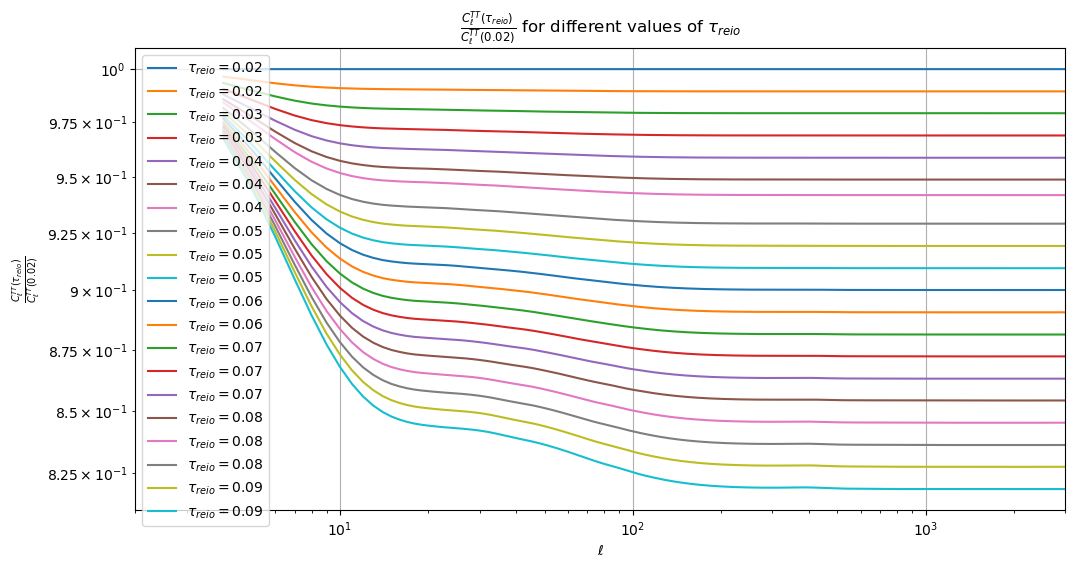

In [19]:
plt.figure(figsize=(12, 6))
plt.xlim([2,3000])
for i in range (a):
    l = ell[(i * alpha)+2:(i + 1)*alpha]
    y = tt[(i * alpha)+2:(i + 1)*alpha]/tt[2:alpha]
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.loglog(l,y, label=string)
    plt.legend()
plt.xlabel('$\ell$')
plt.ylabel(r'$\frac{C_{\ell}^{TT}(\tau_{reio})}{C_{\ell}^{TT}(0.02)}$')
plt.title(r'$\frac{C_{\ell}^{TT}(\tau_{reio})}{C_{\ell}^{TT}(0.02)}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  

----
## Searching $\beta \tau^2$ in different spectra
----

In [20]:
def beta(ell, tau, C_l):
    if not isinstance(tau, np.ndarray):
        print('WARNING: this function works only with NumPy arrays')
    else:
        C_len = C_l #we scale C_l due to its low values
        loss_arr = np.empty(2000)
        a_arr = np.empty(2000)
        for i in range(2000):
            a = 10 * i
            a_arr[i] = a  
            loss = np.sum(abs(C_len - a * (tau**2)))
            loss_arr[i] = loss 
        m = np.argmin(loss_arr)  
        a_min = a_arr[m]  
        return a_min

In [21]:
df1 = pd.read_csv('CL_20_50.csv')

In [22]:
ell_1 = df1['ell'].values
ee_1 = df1['EE'].values
te_1 = df1['TE'].values
tt_1 = df1['TT'].values
tau_1 = df1['tau'].values

In [23]:
a_1 = len(t_reio)
b_1 = len(ell_1)
alpha_1 = int(b_1/a_1)
ell_11 = np.array(ell_1[0:alpha_1])
fa = (10**12)*ell_11*(ell_11+1.)/(2*np.pi)

In [24]:
ratio_ee_1 = []
for i in range(a_1):
    ratio_ee_1.append(ee_1[i*alpha_1:(i+1)*alpha_1]/ee_1[0:alpha_1])
ratio_ee_1 = np.concatenate(ratio_ee_1)

In [25]:
len(ratio_ee_1)

980

we sort the array to use $\tau$ as variable and $\ell$ fixed

In [26]:
x_t = []
x_l = []
y_ee = []
y_ee_ratio = []
y_te = []
y_tt = []

for i in range (alpha_1):
    for j in range (a_1):
        index = int(i+j*alpha_1)
        x_t.append(tau_1[index])
        x_l.append(ell_1[index])
        y_ee.append(ee_1[index])
        y_te.append(te_1[index])
        y_tt.append(tt_1[index])
        y_ee_ratio.append(ratio_ee_1[index]) 

we can see the sorted dataframe


In [ ]:
import os
notebook_folder = os.path.dirname('')
data_folder = os.path.join(notebook_folder, "..", "Data")
def data_path(dat_id):
    return os.path.join(data_folder, dat_id)
def save_file(dat_id,df):
    df.to_csv(data_path(dat_id), index=False)

In [27]:
data = {'tau':x_t,'ell':x_l, 'EE':y_ee_ratio, 'TE':y_te, 'TT':y_tt}
df = pd.DataFrame(data)
save_file('CL_6_50_sort.csv',df)
print(df)

        tau  ell        EE            TE            TT
0    0.0261    2  1.000000  5.184006e-13  2.933414e-10
1    0.0314    2  1.273441  5.387824e-13  2.934822e-10
2    0.0366    2  1.544705  5.508671e-13  2.929715e-10
3    0.0419    2  1.824281  5.619703e-13  2.934585e-10
4    0.0472    2  2.099245  5.663158e-13  2.927098e-10
..      ...  ...       ...           ...           ...
975  0.1050   50  0.856667 -6.732802e-16  5.596036e-13
976  0.1103   50  0.848009 -6.656887e-16  5.546091e-13
977  0.1156   50  0.839514 -6.589456e-16  5.496899e-13
978  0.1208   50  0.831300 -6.526089e-16  5.449578e-13
979  0.1261   50  0.822929 -6.454089e-16  5.402047e-13

[980 rows x 5 columns]


In [28]:
be = beta(np.array(x_l),np.array(x_t),np.array(y_ee_ratio))
print(be)

130.0


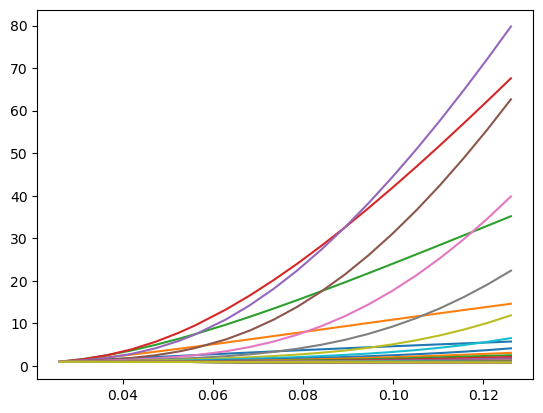

In [29]:
for i in range(alpha_1):
    plt.plot(x_t[(i * a_1):(i + 1)*a_1],y_ee_ratio[(i * a_1):(i + 1)*a_1])

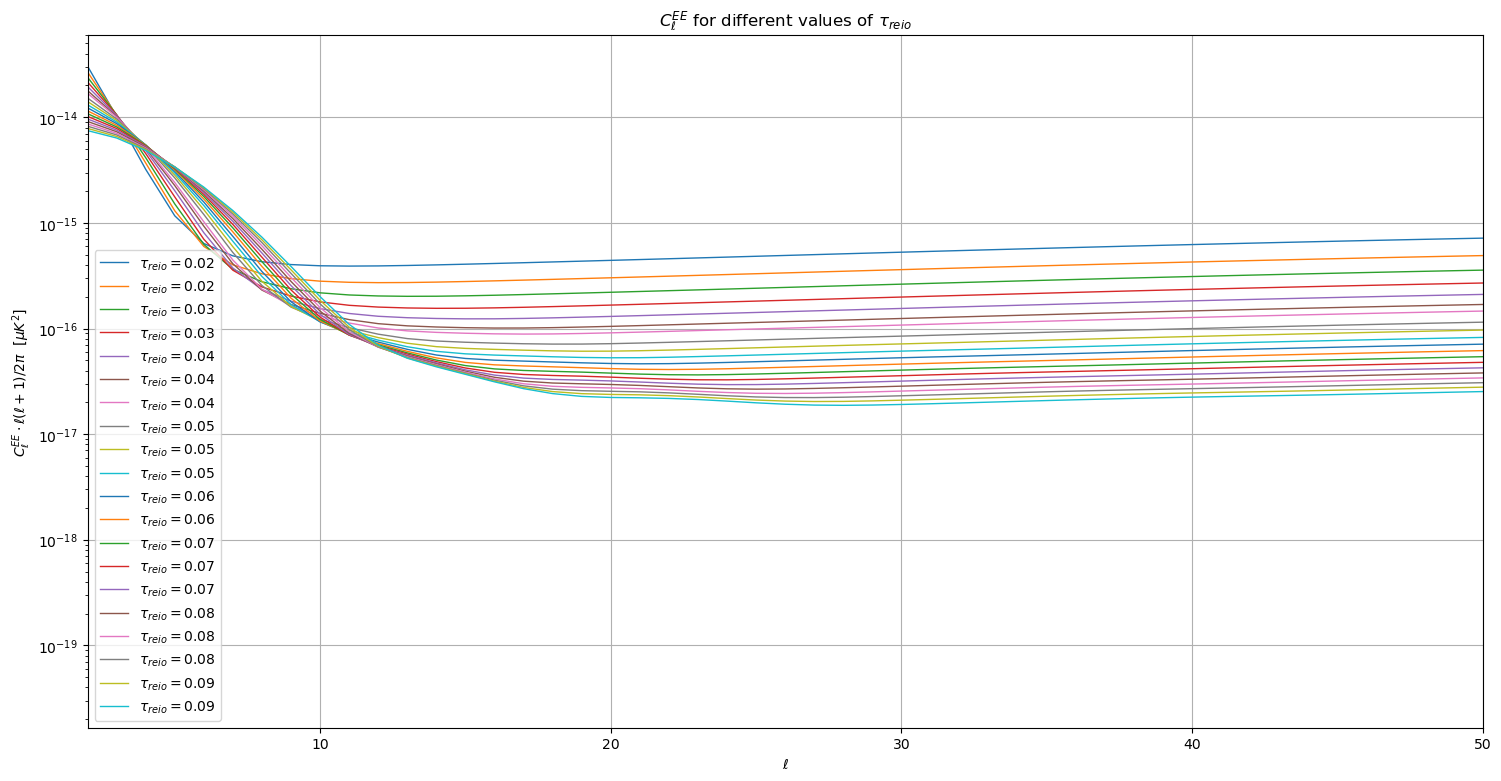

In [30]:
plt.figure(figsize=(18, 9))
plt.xlim([2,50])

for i in range(a):
    l = ell[i * alpha:(i + 1) * alpha]
    y = ee[i * alpha:(i + 1) * alpha]/(be*tau[i * alpha:(i + 1) * alpha]**2)
    string = r'$\tau_{reio}=$' + str(round(t_reio[i], 2))
    plt.semilogy(l, y, lw=1, label=string)
    plt.legend()  

plt.xlabel('$\ell$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  

In [31]:
x_t = np.array(x_t)
x_l = np.array(x_l)
y_ee = np.array(y_ee)
y_te = np.array(y_te)
y_tt = np.array(y_tt)

In [32]:
prop = beta(x_l,x_t,y_te)
print(prop)

0.0


----
## Searching $\gamma e^{-2\tau}$ in different spectra
----

In [33]:
def gamma(ell, tau, C_l):
    if not isinstance(tau, np.ndarray):
        print('WARNING: this function works only with NumPy arrays')
    else:
        C_len = (10**15)*C_l #we scale C_l due to its low values
        loss_arr = np.empty(200)
        a_arr = np.empty(200)
        for i in range(200):
            a = 0.1 * i
            a_arr[i] = a  
            loss = np.sum(abs(C_len - a * np.e**(-2*tau)))
            loss_arr[i] = loss 
        m = np.argmin(loss_arr)  
        a_min = a_arr[m]  
        return a_min/(10**15)

In [34]:
ga = gamma(ell[800:],tau[800:],tt[800:])
print(ga)

3.0000000000000004e-16


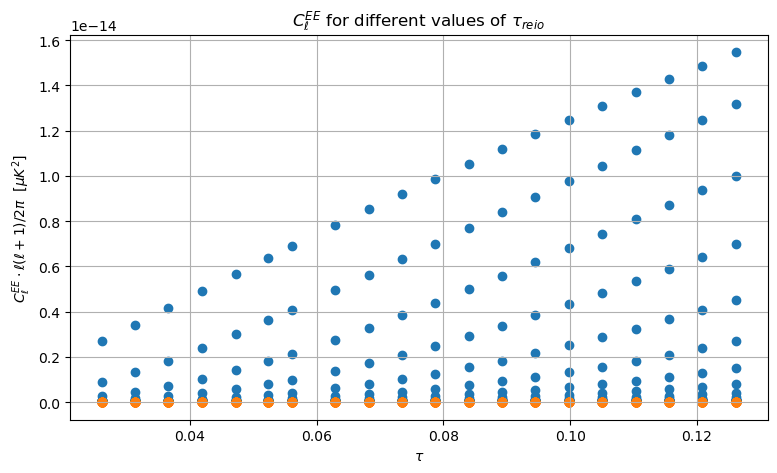

In [35]:
plt.figure(figsize=(9, 5))
plt.scatter(x_t,(y_ee))
plt.scatter(x_t,prop*x_t**2)
plt.xlabel(r'$\tau$')
plt.ylabel('$C^{EE}_{\ell}\cdot \ell(\ell+1)/2\pi \ \ [\mu K^2]$')
plt.title(r'$C_{\ell}^{EE}$ for different values of $\tau_{reio}$')
plt.grid(True)
plt.show()  

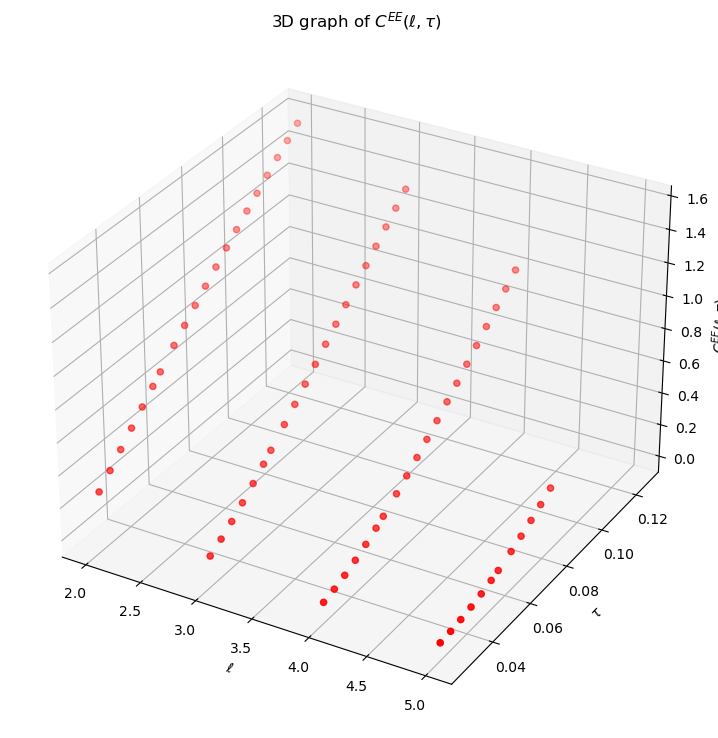

In [36]:
from mpl_toolkits.mplot3d import Axes3D

# Crea il grafico 3D
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

# Crea il grafico di dispersione (scatter plot)
#ax.scatter(x_l[0:20*6], x_t[0:20*6], y_ee[0:20*6], c='b', marker='o')
ax.scatter(x_l[0:12*6], x_t[0:12*6], y_ee[0:12*6], c='r', marker='o')
# Etichette degli assi
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\tau$')
ax.set_zlabel(r'$C^{EE}(\ell, \tau)$')
ax.set_title(r'3D graph of $C^{EE}(\ell, \tau)$')

# Mostra il grafico
plt.show()


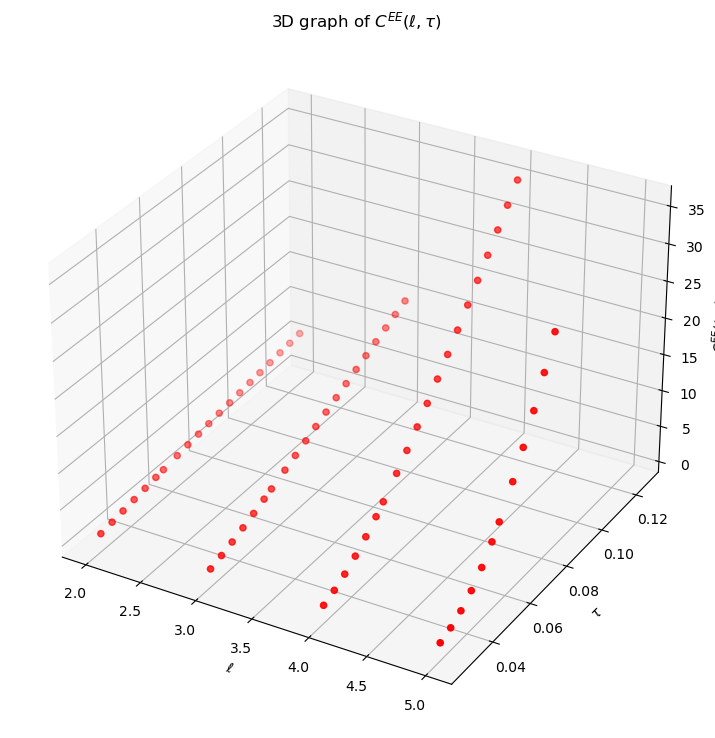

In [37]:
from mpl_toolkits.mplot3d import Axes3D

# Crea il grafico 3D
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111, projection='3d')

# Crea il grafico di dispersione (scatter plot)
#ax.scatter(x_l[0:20*6], x_t[0:20*6], y_ee[0:20*6], c='b', marker='o')
ax.scatter(x_l[0:12*6], x_t[0:12*6], y_ee_ratio[0:12*6], c='r', marker='o')
# Etichette degli assi
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\tau$')
ax.set_zlabel(r'$C^{EE}(\ell, \tau)$')
ax.set_title(r'3D graph of $C^{EE}(\ell, \tau)$')

# Mostra il grafico
plt.show()
